In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("train.csv", index_col="Territory X Date")

In [5]:
df.head()

,target,cases,Territory,Date
Territory X Date,,,,
Afghanistan X 1/22/20,0,0,Afghanistan,1/22/20
Afghanistan X 1/23/20,0,0,Afghanistan,1/23/20
Afghanistan X 1/24/20,0,0,Afghanistan,1/24/20
Afghanistan X 1/25/20,0,0,Afghanistan,1/25/20
Afghanistan X 1/26/20,0,0,Afghanistan,1/26/20


- target variable is the cumulative number of deaths caused by COVID-19 in each country by each date.

In [6]:
df.shape

(11913, 4)

In [7]:
df.Date.unique()

array(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20',
       '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20',
       '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20',
       '3/16/20', '3/17/20', '3/18/20'], dtype=object)

In [8]:
df.Territory.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas (the)', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic (the)', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros (the)', 'Congo (the)', 'Costa Rica',
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea (the)",
       'Democratic Republic of the Congo (the)', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic (the)', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
 

In [9]:
def get_ratio(cases, target):
    print
    if cases > 0:
        return target / (cases)
    else:
        return 0

In [10]:
df_france = df[df.Territory == "France"]
df_italy = df[df.Territory == "Italy"]
df_spain = df[df.Territory == "Spain"]
df_china = df[df.Territory == "China"]

In [11]:
df_italy["ratio"] = df_italy.apply(lambda x: get_ratio(x["cases"], x["target"]), axis=1)
df_france["ratio"] = df_france.apply(lambda x: get_ratio(x["cases"], x["target"]), axis=1)
df_china["ratio"] = df_china.apply(lambda x: get_ratio(x["cases"], x["target"]), axis=1)
df_spain["ratio"] = df_spain.apply(lambda x: get_ratio(x["cases"], x["target"]), axis=1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

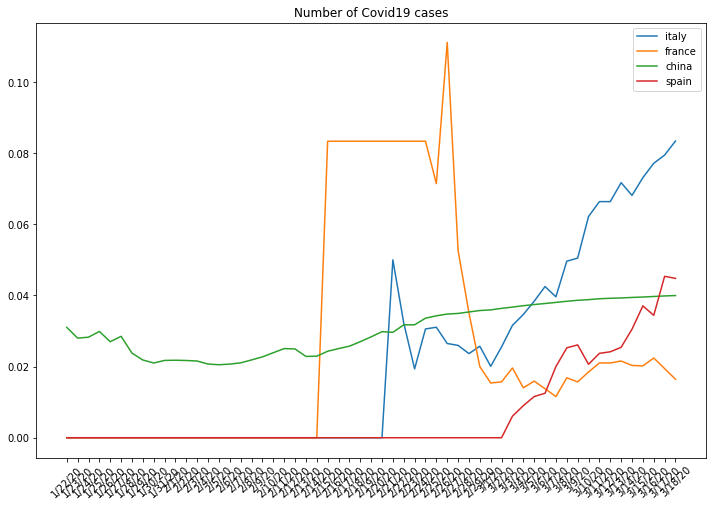

In [12]:
plt.figure(figsize=(12,8))
#plt.plot(df_italy['Date'], df_italy['cases'], label="cases")
#plt.plot(df_italy['Date'], df_italy['target'], label="target")
plt.plot(df_italy['Date'], df_italy['ratio'], label="italy")
plt.plot(df_france['Date'], df_france['ratio'], label="france")
plt.plot(df_china['Date'], df_china['ratio'], label="china")
plt.plot(df_spain['Date'], df_spain['ratio'], label="spain")
plt.title("Number of Covid19 cases")
plt.xticks(rotation=45)
plt.legend()
plt.show()

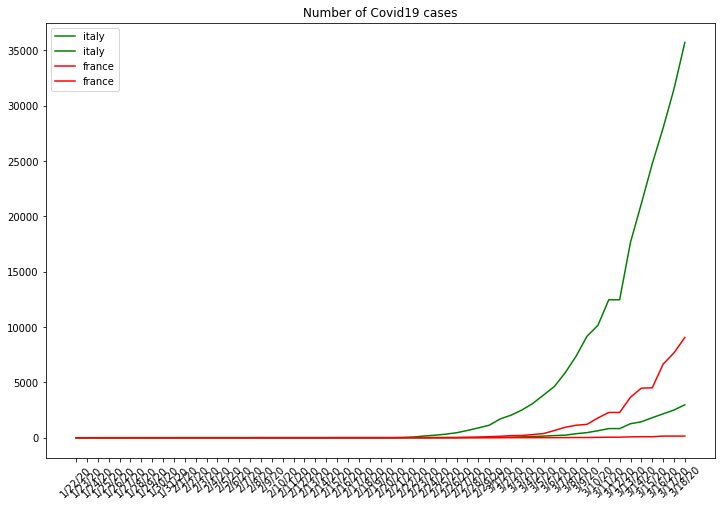

In [13]:
plt.figure(figsize=(12,8))
plt.plot(df_italy['Date'], df_italy['cases'], label="italy", c="g")
plt.plot(df_italy['Date'], df_italy['target'], label="italy", c="g")
plt.plot(df_france['Date'], df_france['cases'], label="france", c="r")
plt.plot(df_france['Date'], df_france['target'], label="france", c="r")
plt.title("Number of Covid19 cases")
plt.xticks(rotation=45)
plt.legend()
plt.show()

<h1> Get country neighbours

In [14]:
import requests

In [15]:
def get_name(countryCode):
    return requests.get("https://restcountries.eu/rest/v2/alpha/" + countryCode + "?fields=name").json()["name"]

In [16]:
def get_code(countryName):
    response = requests.get("https://restcountries.eu/rest/v2/name/" + countryName + '?fields=alpha3Code').json()
    print(response)
    return response[0]["alpha3Code"]

In [17]:
def get_popu(countryName):
    response = requests.get("https://restcountries.eu/rest/v2/name/" + countryName + '?fields=population').json()
    print(response)
    return response[0]["population"]

In [18]:
get_popu("France")

[{'population': 66710000}]


66710000

In [19]:
get_code('United States of America')

[{'alpha3Code': 'USA'}]


'USA'

In [20]:
def get_neighbours(country):
    response = requests.get("https://restcountries.eu/rest/v2/name/" + country)
    neighbours = []
    for code in response.json()[0]['borders']:
        response = requests.get("https://restcountries.eu/rest/v2/alpha/" + code + "?fields=name")
        neighbours.append(response.json()["name"])
    return neighbours

In [21]:
get_neighbours("Morocco")

['Algeria', 'Western Sahara', 'Spain']

In [22]:
# interresting fields: population, area, borders, languages, 'regionalBlocs'
# get a uniform country name

<h1> Check Covid evolution for a country and its neighbours

In [23]:
ref_country = "France"

In [24]:
df.Date.min(), df.Date.max() #String need to change into Datetime

('1/22/20', '3/9/20')

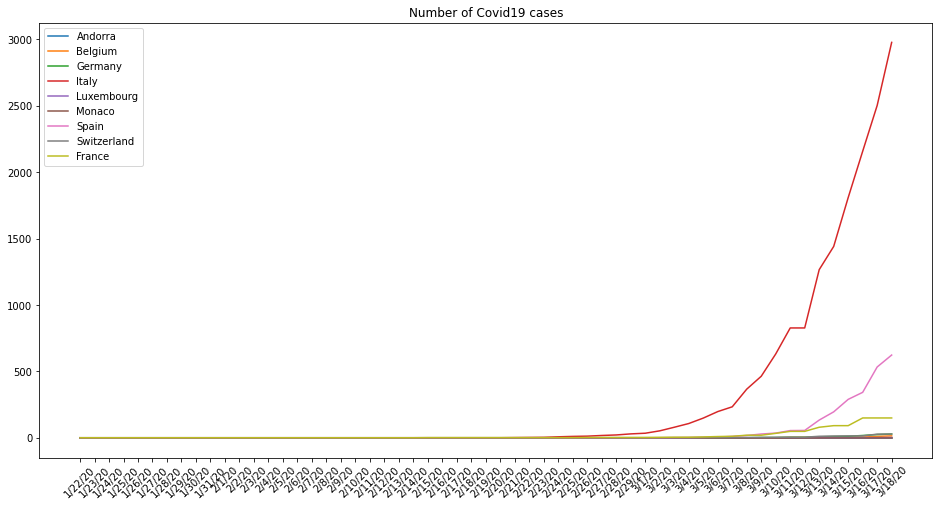

In [25]:
plt.figure(figsize=(16,8))
for country in get_neighbours(ref_country) + [ref_country]:
    df_country = df[df.Territory == country]
    plt.plot(df_country['Date'], df_country['target'], label=country)
    #plt.plot(df_country['Date'], df_country['cases'], label=country)
plt.xticks(rotation=45)
plt.title("Number of Covid19 cases")
plt.legend()
plt.show()

<h1> Get climate info per country

<h1> PROPHET - Time series for a specific location

In [26]:
from fbprophet import Prophet

In [27]:
def get_df_loc(y, country):
    df_loc = df[df.Territory == country].reset_index()[["Date", y]]
    df_loc = df_loc.rename(columns={'Date': 'ds', y: 'y'})
    df_loc.ds = pd.to_datetime(df_loc.ds)
    return df_loc

In [28]:
def make_forecast(df, growth, cap, floor):
    if growth == "logistic":
        df['cap'] = cap
        df['floor'] = floor
    model = Prophet(growth=growth, changepoint_prior_scale=7, yearly_seasonality=False, daily_seasonality=False, )
    model.fit(df)
    future = model.make_future_dataframe(periods=7, freq="D", include_history=True)
    if growth == "logistic":
        future['cap'] = cap
        future['floor'] = floor
    return model, future

In [29]:
def get_ratio(df_cases, df_target, step=7):
    
    cases_rate = (df_cases.iloc[-1].y - df_cases.iloc[-step].y)
    target_rate = (df_target.iloc[-1].y - df_target.iloc[-step].y)
    
    return target_rate / cases_rate   

<h2> Country selection

In [30]:
ref_country = "Israel"

In [ ]:
df_cases = get_df_loc("cases", country)
df_target = get_df_loc("target", country)

<h2> Cases forecast

In [31]:
def cases_prediction(df_cases):
    floor = df_cases.y.min()
    cap = 100000000 #get_popu(country)/10
    if df_cases.y.max() > 0:
        print("floor: ", floor, "cap: ", cap)
        model_cases, future = make_forecast(df_cases, "logistic", cap, floor)
        forecast_cases = model_cases.predict(future)
        return model_cases, forecast_cases

In [32]:
model_cases, forecast_cases = cases_prediction(df_cases)

AttributeError: 'str' object has no attribute 'y'

<h2> Target forecast

In [33]:
def target_prediction(df_target, df_cases, forecast_cases):
    floor = df_target.y.min()
    cap = 1 + df_target.iloc[-1].y + get_ratio(df_cases, df_target) * max((forecast_cases.iloc[-1]['yhat'] - df_cases.iloc[-1]['y']), 0)
    if df_target.y.max() > 0:
        print( "floor: ", floor, "cap: ", cap)
        model_target, future = make_forecast(df_target, "logistic", cap, floor)
        forecast_target = model_target.predict(future)
        return model_target, forecast_target

In [34]:
model_target, forecast_target = target_prediction(df_target, df_cases, forecast_cases)

NameError: name 'forecast_cases' is not defined

<h2> Plot forecast

In [35]:
plt.figure(figsize=(18, 8))
model_target.plot(forecast_target, xlabel = 'Date', ylabel = "Target", plot_cap=False)
model_cases.plot(forecast_cases, xlabel = 'Date', ylabel = "Cases", plot_cap=False)
plt.title('Covid19 target in ' + ref_country)
plt.xticks(rotation=45)
plt.legend()
plt.show()

NameError: name 'model_target' is not defined

<Figure size 1296x576 with 0 Axes>

<h1> Get prediction per country

In [36]:
df_default = pd.DataFrame(data=["2020-03-19", "2020-03-20", "2020-03-21", "2020-03-22", "2020-03-23", "2020-03-24", "2020-03-25"], columns=["ds"])
df_default.ds = pd.to_datetime(df_default.ds)
df_default["yhat"] = np.zeros(7, int)

In [37]:
# Store into a pickle model and forecast
def get_prediction(country):
    df_cases = get_df_loc("cases", country)
    df_target = get_df_loc("target", country)
    
    if (df_cases.y.max() > 0) & (df_target.y.max() > 0) :
        model_cases, forecast_cases = cases_prediction(df_cases)
        model_target, forecast_target = target_prediction(df_target, df_cases, forecast_cases)
        return forecast_target.iloc[-7:][['ds', 'yhat']]
    else:
        return df_default

In [38]:
y_pred = get_prediction("Argentina")

Argentina
floor:  0 cap:  100000000
floor:  0 cap:  7.608335232024318


In [39]:
y_pred

,ds,yhat
57,2020-03-19,2.716696
58,2020-03-20,3.094801
59,2020-03-21,3.360366
60,2020-03-22,3.751706
61,2020-03-23,4.014284
62,2020-03-24,4.268404
63,2020-03-25,4.518269


In [40]:
# Issue/ ISSUE:  Argentina
# Put a timer

In [41]:
selection = ["Andorra", "Angola", "Antigua and Barbuda"]
country_selection = df.Territory.unique()

def generate_subfile():
    df_sub = pd.DataFrame()
    for i, country in enumerate(country_selection):
        print(i, "out of", len(country_selection), country)
        try:
            y_pred = get_prediction(country)
            df_res = y_pred.iloc[-7:][['ds', 'yhat']]
            df_res["Territory X Date"] = df_res.ds.apply(lambda x: country + " X " + x.strftime('%-m/%d/%y'))
            df_res["target"] = df_res["yhat"]
            df_sub = pd.concat([df_sub, df_res[["Territory X Date", "target"]]])
        except:
            print("ISSUE: ", country)
    return df_sub

In [42]:
df_sub = generate_subfile()

Afghanistan
Albania
floor:  0 cap:  100000000


/usr/local/lib/python3.7/site-packages/fbprophet/forecaster.py:1256: RuntimeWarning:

overflow encountered in exp



floor:  0 cap:  54.25111954579301
Algeria
floor:  0 cap:  100000000
floor:  0 cap:  24.237350610989115
Andorra
Angola
Antigua and Barbuda
Argentina
floor:  0 cap:  100000000
floor:  0 cap:  7.608335232024318
Armenia
Aruba
Australia
floor:  0 cap:  100000000
floor:  0 cap:  681823.3436292337
Austria
floor:  0 cap:  100000000
floor:  0 cap:  24.49547086307308
Azerbaijan
floor:  0 cap:  100000000
floor:  0 cap:  11.046894488316081
Bahamas (the)
Bahrain
floor:  0 cap:  100000000
floor:  0 cap:  6.610059948394589
Bangladesh
floor:  0 cap:  100000000
floor:  0 cap:  8.026580322730656
Barbados
Belarus
Belgium
floor:  0 cap:  100000000
floor:  0 cap:  64.926431613652
Belize
Benin
Bermuda
Bhutan
Bolivia (Plurinational State of)
Bosnia and Herzegovina
Botswana
Brazil
floor:  0 cap:  100000000
floor:  0 cap:  25.20002396699314
Brunei Darussalam
Bulgaria
floor:  0 cap:  100000000
floor:  0 cap:  10.459340816139663
Burkina Faso
floor:  0 cap:  100000000
floor:  0 cap:  15.817373786514278
Burundi
Ca

In [62]:
df_sub = df_sub.reset_index()
print(df_sub.shape)
df_sub.tail()

(1463, 2)


,Territory X Date,target
2,Zimbabwe X 03/21/20,0.0
3,Zimbabwe X 03/22/20,0.0
4,Zimbabwe X 03/23/20,0.0
5,Zimbabwe X 03/24/20,0.0
6,Zimbabwe X 03/25/20,0.0


<h1> Fill submission file

In [45]:
submit_file = "SampleSubLocal.csv"
df_submit = pd.read_csv(submit_file)
df_submit.shape

(1463, 2)

In [68]:
#df_submit["target"] =  df_sub["target"]

In [69]:
df_sub.to_csv("mySubmission_new.csv", index=False)